# TRANSFER LEARNING

**Problem:** Classify cats and dogs images with deep learning using transfer learning

**Data:** (https://www.microsoft.com/en-us/download/details.aspx?id=54765)

## PART 1: PREPROCESSING

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#!pip install opencv-python

In [2]:
import cv2 as cv

In [3]:
path_to_image = os.getcwd()+"\\Cat\\10.jpg"

In [4]:
img = cv.imread(path_to_image)

In [5]:
def show_image(image):
    cv.imshow("frame",img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [6]:
img.shape

(268, 320, 3)

In [9]:
show_image(img)

In [10]:
a = cv.resize(img,(128,128))

In [11]:
show_image(a)

In [12]:
categories = ["Cat","Dog"]

In [13]:
path_to_dataset = os.getcwd()

In [24]:
images = []
for category in categories:
    max_image_number = 0
    idx = categories.index(category)
    for image in os.listdir(f"{path_to_dataset}\\{category}"):
        if max_image_number == 1000:
            break
        path_to_image = f"{path_to_dataset}\\{category}\\{image}"
        try:
            img = cv.imread(path_to_image,cv.IMREAD_COLOR)
            img = cv.resize(img,(128,128))
            img = img/250   
            images.append([idx,img])
            max_image_number += 1
        except Exception as e:
            print(e)
            pass

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.6.0) D:\a\ope

In [25]:
len(images)

2000

In [29]:
np.array(images)[1:5]

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_2116\4073890964.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(images)[1:5]


array([[0, array([[[0.156, 0.172, 0.152],
                   [0.168, 0.172, 0.156],
                   [0.188, 0.172, 0.156],
                   ...,
                   [0.572, 0.636, 0.632],
                   [0.684, 0.808, 0.82 ],
                   [0.648, 0.8  , 0.808]],

                  [[0.168, 0.184, 0.164],
                   [0.172, 0.176, 0.16 ],
                   [0.192, 0.172, 0.156],
                   ...,
                   [0.608, 0.66 , 0.656],
                   [0.676, 0.792, 0.808],
                   [0.636, 0.776, 0.796]],

                  [[0.156, 0.172, 0.152],
                   [0.148, 0.152, 0.136],
                   [0.164, 0.148, 0.132],
                   ...,
                   [0.58 , 0.616, 0.62 ],
                   [0.636, 0.732, 0.756],
                   [0.676, 0.796, 0.824]],

                  ...,

                  [[0.092, 0.088, 0.096],
                   [0.076, 0.072, 0.08 ],
                   [0.072, 0.068, 0.076],
                

In [30]:
X = []
y = []

In [31]:
y = [x[0] for x in images]

In [33]:
X = [x[1] for x in images]

In [34]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [40]:
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=0,shuffle=True)

In [42]:
len(X_train)

1600

In [43]:
len(X_val)

200

In [44]:
len(X_test)

200

In [46]:
y_train[0:4]

[0, 0, 1, 0]

In [68]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [47]:
import pickle

In [49]:
with open('X_train.pickle', 'wb') as output:
    pickle.dump(X_train,output)

In [50]:
with open('y_train.pickle', 'wb') as output:
    pickle.dump(y_train,output)

In [51]:
with open('X_val.pickle', 'wb') as output:
    pickle.dump(X_val,output)

In [52]:
with open('y_val.pickle', 'wb') as output:
    pickle.dump(y_val,output)

In [53]:
with open('X_test.pickle', 'wb') as output:
    pickle.dump(X_test,output)

In [54]:
with open('y_test.pickle', 'wb') as output:
    pickle.dump(y_test,output)

## PART 2: TRANSFER LEARNING

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import os, shutil, pathlib

In [56]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top = False,
    input_shape=(128,128,3),
    weights='imagenet',
    pooling="max"
)

In [57]:
for layer in base_model.layers:
    layer.trainale = False

In [58]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024,activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1024,activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1024,activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1024,activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1024,activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

predictions = tf.keras.layers.Dense(1,activation="sigmoid")(x)


In [59]:
head_model = tf.keras.Model(inputs=base_model.inputs,outputs=predictions)

In [60]:
head_model.compile( optimizer="adam",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

In [69]:
history = head_model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
13/13 [==============================] - 304s 20s/step - loss: 0.1771 - accuracy: 0.9362 - val_loss: 1.1460 - val_accuracy: 0.6500
Epoch 2/10
13/13 [==============================] - 303s 24s/step - loss: 0.0917 - accuracy: 0.9644 - val_loss: 2.4972 - val_accuracy: 0.6250
Epoch 3/10
13/13 [==============================] - 247s 19s/step - loss: 0.0434 - accuracy: 0.9837 - val_loss: 2.0717 - val_accuracy: 0.6600
Epoch 4/10
13/13 [==============================] - 241s 18s/step - loss: 0.0189 - accuracy: 0.9931 - val_loss: 3.1558 - val_accuracy: 0.6350
Epoch 5/10
13/13 [==============================] - 248s 19s/step - loss: 0.0189 - accuracy: 0.9931 - val_loss: 3.8092 - val_accuracy: 0.6050
Epoch 6/10
13/13 [==============================] - 246s 19s/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.8419 - val_accuracy: 0.8350
Epoch 7/10
13/13 [==============================] - 259s 20s/step - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.9410 - val_accuracy: 0.7850
Epoch 

In [70]:
head_model.evaluate(X_test,y_test)

7/7 [==============================] - 15s 519ms/step - loss: 2.2518 - accuracy: 0.8350


[2.2517752647399902, 0.8349999785423279]

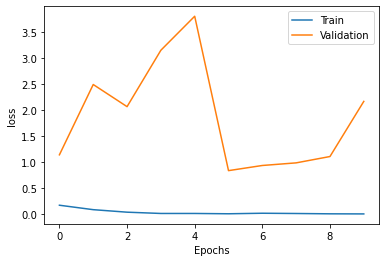

In [71]:
plt.plot(history.history["loss"], label= "Train")
plt.plot(history.history["val_loss"], label= "Validation")


plt.xlabel("Epochs")
plt.ylabel("loss")
          
plt.legend()
plt.show()

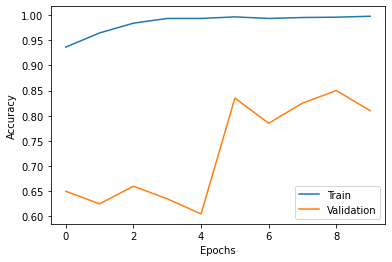

In [72]:
plt.plot(history.history["accuracy"], label= "Train")
plt.plot(history.history["val_accuracy"], label= "Validation")


plt.xlabel("Epochs")
plt.ylabel("Accuracy")
          
plt.legend()
plt.show()

Future work is needed, model seems to overfit to train data..

In [73]:
with open("model.pickle", "wb") as f:
    pickle.dump(head_model,f)

INFO:tensorflow:Assets written to: ram://4dc5b5ec-1a7a-4425-bacd-f2b481b5590c/assets


INFO:tensorflow:Assets written to: ram://4dc5b5ec-1a7a-4425-bacd-f2b481b5590c/assets


In [74]:
head_model.save("trained_model")

INFO:tensorflow:Assets written to: trained_model\assets


INFO:tensorflow:Assets written to: trained_model\assets
